In [4]:
import matplotlib.pyplot as plt
import pickle
from matplotlib import rc
import numpy as np

import matplotlib.path as mpath

#definition of plot elements:
star = mpath.Path.unit_regular_polygon(8)
circle = mpath.Path.unit_circle()
nvertices=np.dot(star.vertices,np.array([[.92,.38],[-.38,.92]]))
# concatenate the circle with an internal cutout of the star
own8 =  mpath.Path(
    vertices=np.concatenate([nvertices, 0.8*nvertices[::-1, ...]]),
    codes=np.concatenate([star.codes, star.codes]))

star = mpath.Path.unit_regular_polygon(4)
nvertices=np.array([[1,1],[-1,1],[-1,-1],[1,-1],[1,1]])
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
own4 = mpath.Path(
    vertices=np.concatenate([nvertices, 0.8*nvertices[::-1, ...]]),
    codes=np.concatenate([star.codes, star.codes]))


circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
owncirc = mpath.Path(
    vertices=np.concatenate([circle.vertices, 0.1*circle.vertices]),
    codes=np.concatenate([circle.codes, circle.codes]))

In [11]:
#load precalculated data:
with open('susceptibility/lengths/fidelity-pathres.pickle', 'rb') as file:
    pathres=pickle.load(file)
with open('susceptibility/lengths/fidelity-twistres.pickle', 'rb') as file:
    twistres=pickle.load(file)
with open('susceptibility/lengths/fidelity-crazyres.pickle', 'rb') as file:
    crazyres=pickle.load(file)


Text(0.02, 0.5, 'Fidelity susceptibility $\\alpha$')

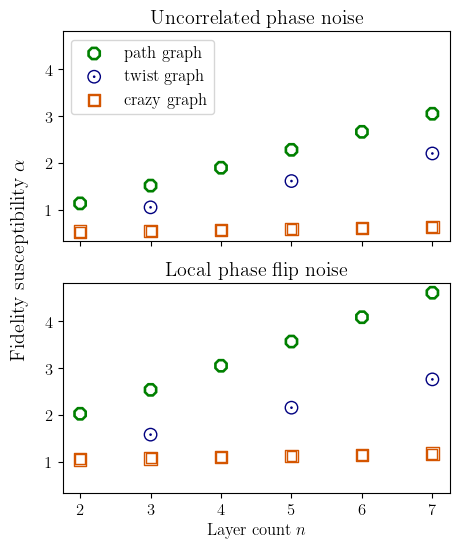

In [12]:
# prepare the data and plot it:
fig, (ax1, ax2) = plt.subplots(2,sharex=True,sharey=True,figsize=[5,6])

xs=[]
ys=[]
for key in pathres:
    xs.append(key)
    ys.append(pathres[key][2][0])
ax1.scatter(xs,ys,marker=own8,facecolors="none",edgecolors="#008000",s=80)

xs=[]
ys=[]
for key in twistres:
    xs.append(key)
    ys.append(twistres[key][2][0])
ax1.scatter(xs,ys,marker=owncirc,facecolors="none",edgecolors="#000080",s=80)

xs=[]
ys=[]
for key in crazyres:
    xs.append(key)
    ys.append(crazyres[key][2][0])
ax1.scatter(xs,ys,marker=own4,facecolors="none",edgecolors="#d45500",s=80)


plt.rcParams['axes.facecolor'] = '#ffffff80'
rc('font',**{'family':'serif','serif':['Palatino Linotype'],'size':12})
rc('text', usetex=True)
ax1.legend(["path graph","twist graph","crazy graph"])

ax1.set_title("Uncorrelated phase noise")

xs=[]
ys=[]
for key in pathres:
    xs.append(key)
    ys.append(pathres[key][3][0])
ax2.scatter(xs,ys,marker=own8,facecolors="none",edgecolors="#008000",s=80)
xs=[]
ys=[]
for key in twistres:
    xs.append(key)
    ys.append(twistres[key][3][0])
ax2.scatter(xs,ys,marker=owncirc,facecolors="none",edgecolors="#000080",s=80)

xs=[]
ys=[]
for key in itwistres:
    xs.append(key)
    ys.append(itwistres[key][3][0])
ax2.scatter(xs,ys,marker=own4,facecolors="none",edgecolors="#d45500",s=80)


ax2.set_title("Local phase flip noise")
ax2.set_xlabel("Layer count $n$")


fig.supylabel("Fidelity susceptibility $\\alpha$")
